The `auction` class implements a market clearing mechanism for a simple double auction.  To successfully clear an auction market there must be both `buy` and `sell` orders, and the supply and demand curves resulting from those orders must intersect at least once.

In [1]:
from auction import *

There are several possible ways the market can clear. In each case, the `price`, `quantity`, and fraction of marginal unit dispatch (called `margin`) is reported, if known.

# Marginal Supply
Clearing on `marginal supply` occurs when a supplier has sufficient capacity to provide for all the demand that would operate at the clearing price. In this case, the marginal supply unit is curtailed to the value of the margin.

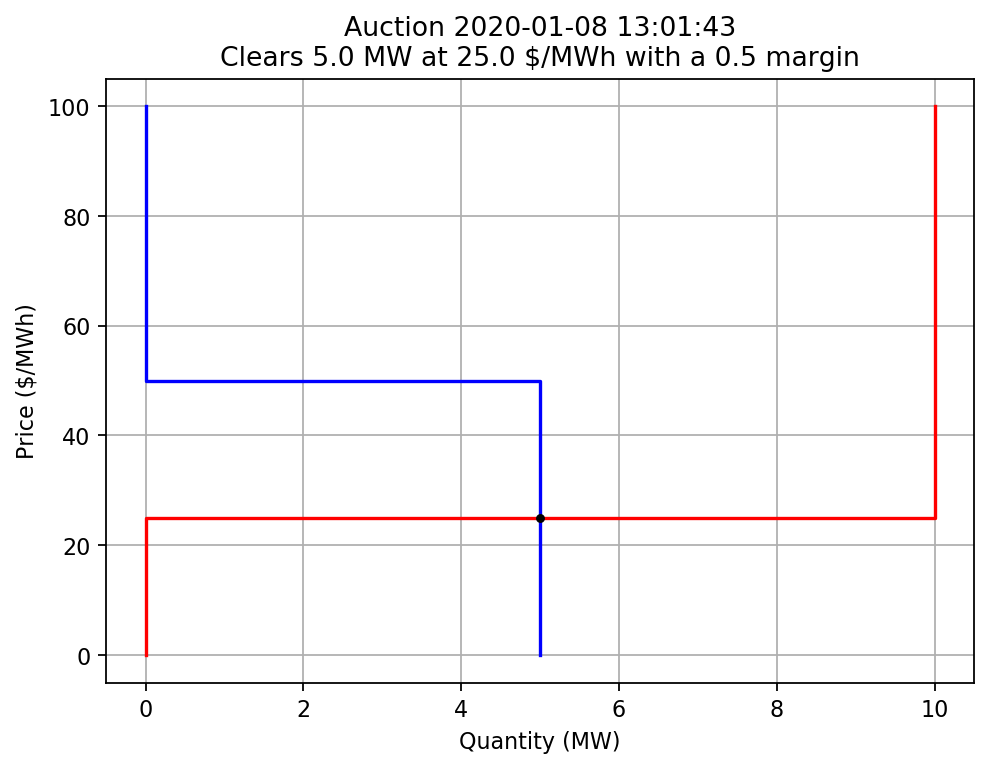

In [8]:
a = auction(price_cap=100)
a.add_order(quantity=5,price=50)
a.add_order(quantity=-10,price=25)
a.clear()
a.plot()

# Marginal Demand
Clearing on `marginal demand` occurs when a supplier has insufficient capacity to provide for all the demand that would operate at the clearing price. In this case, the marginal demand unit is curtailed to the value of the margin.

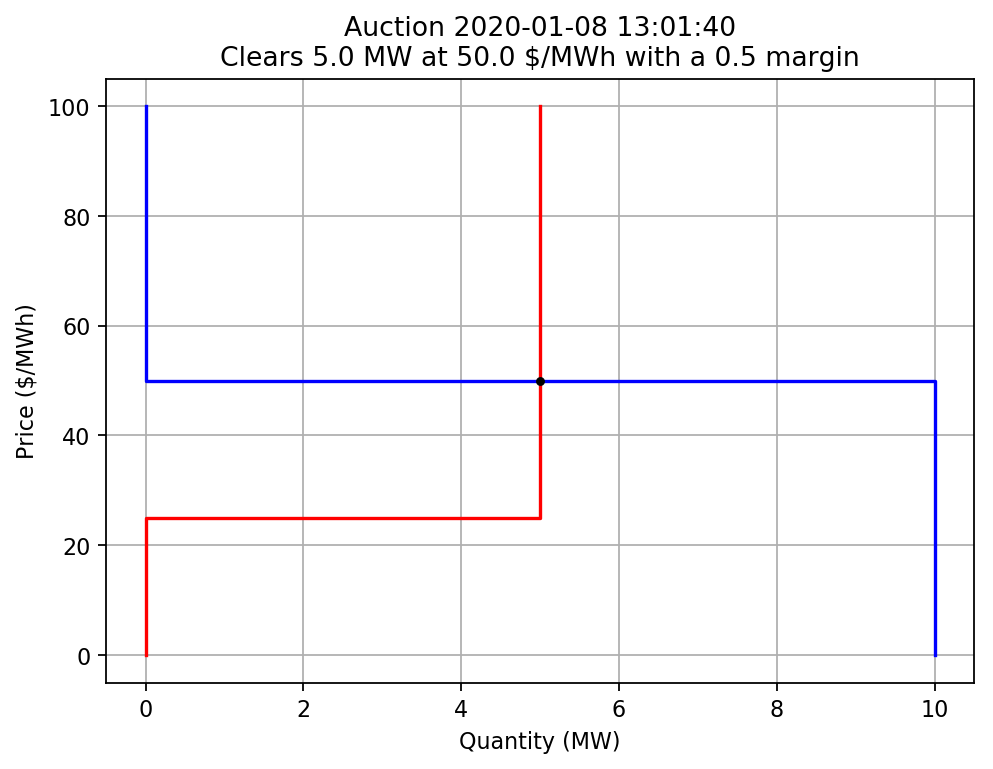

In [3]:
a = auction(price_cap=100)
a.add_order(quantity=10,price=50)
a.add_order(quantity=-5,price=25)
a.clear()
a.plot()

# Full Dispatch
The `full dispatch` case occurs when both the supply and demand are fully dispatched at different order prices.

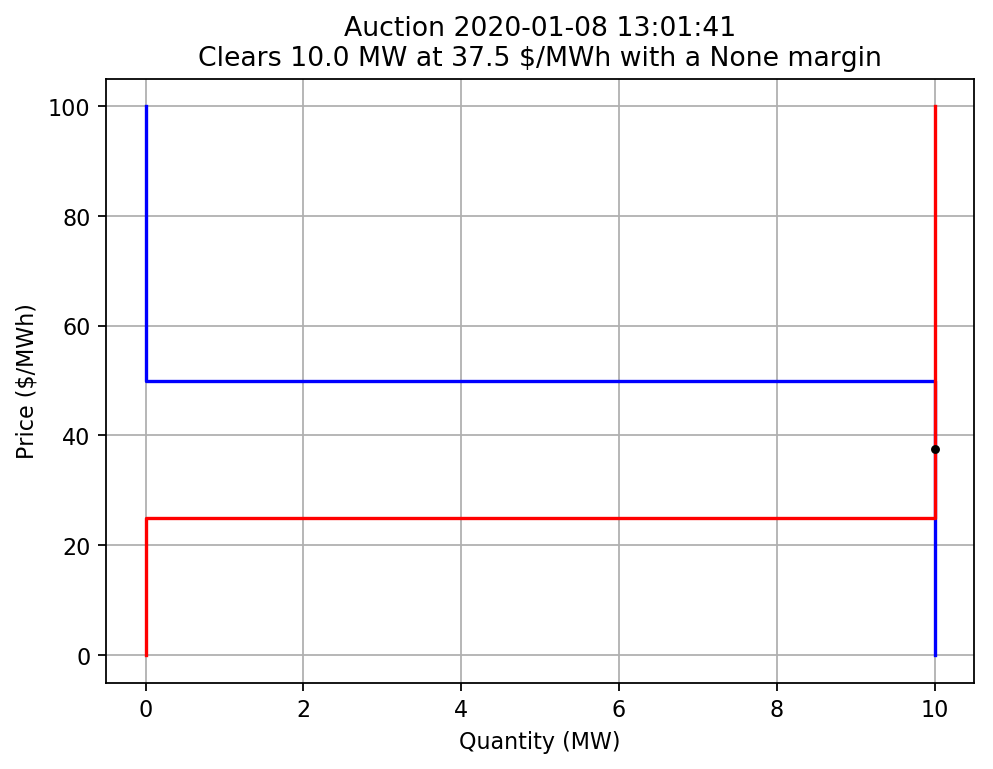

In [4]:
a = auction(price_cap=100)
a.add_order(quantity=10,price=50)
a.add_order(quantity=-10,price=25)
a.clear()
a.plot()

# Full Margin
The `full margin` case occurs when both the supply and demand are fully dispatched at the same order price.

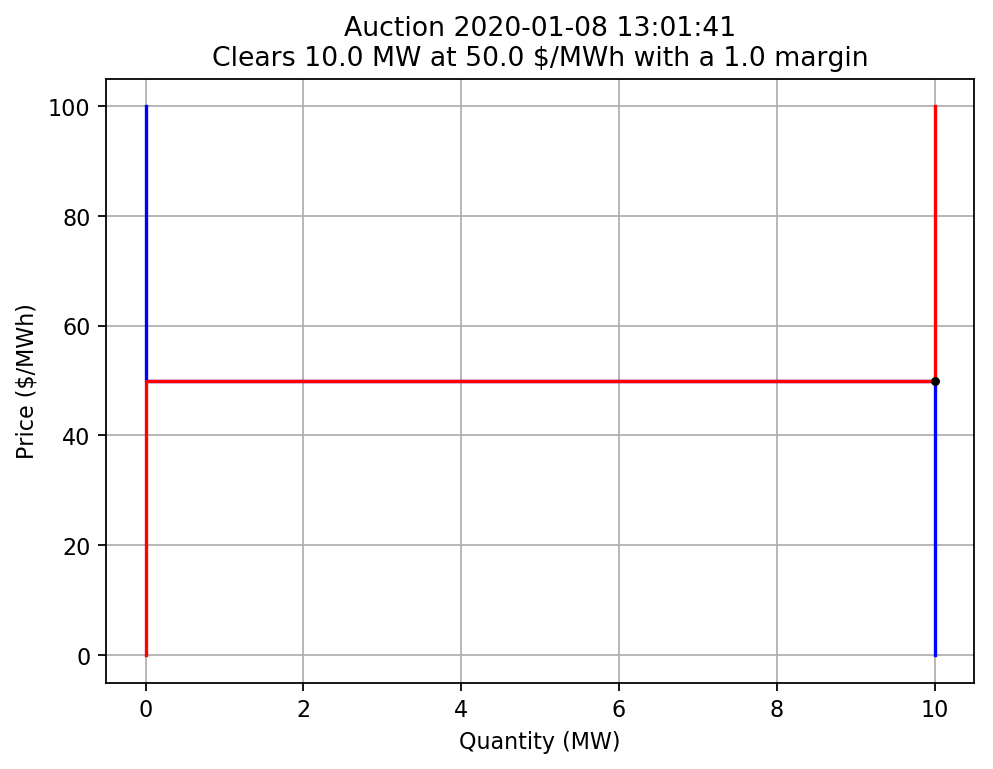

In [5]:
a = auction(price_cap=100)
a.add_order(quantity=10,price=50)
a.add_order(quantity=-10,price=50)
a.clear()
a.plot()

# Zero Dispatch
The `zero dispatch` case occurs when there is no combination of supply and demand that can be dispatched given the orders.

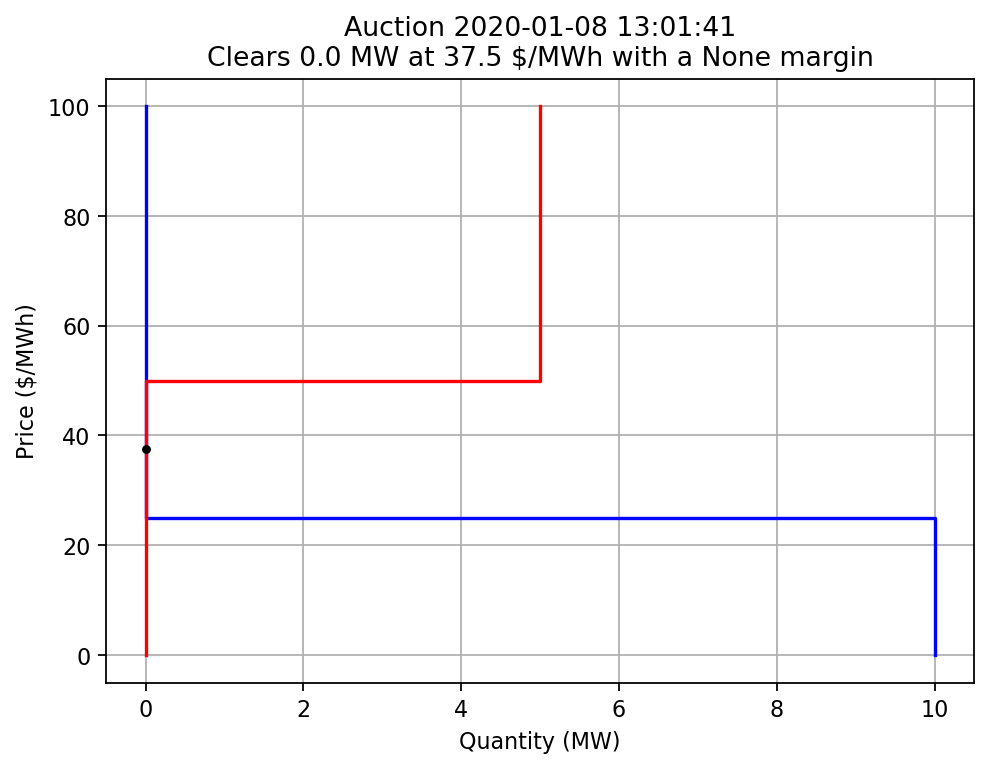

In [6]:
a = auction(price_cap=100)
a.add_order(quantity=10,price=25)
a.add_order(quantity=-5,price=50)
a.clear()
a.plot()

# Cost
The cost of an order can be obtained after the market is cleared.  The following example lists all the orders placed and the corresponding cost. For each market clearing, the total of the buy and sell costs is always 0.

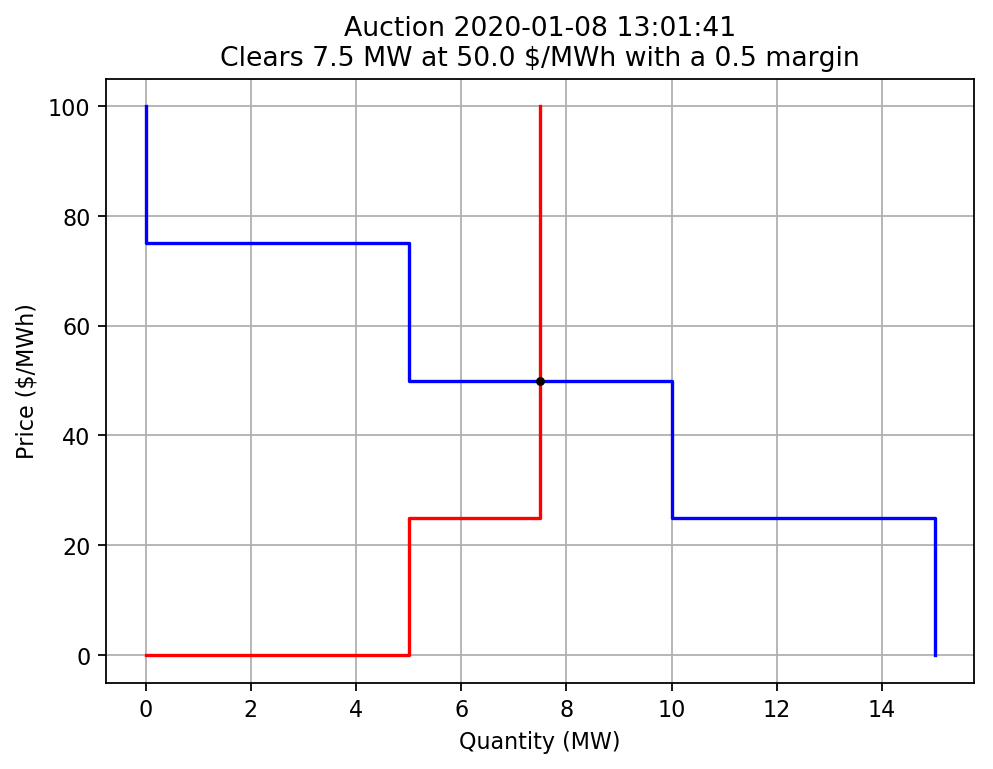

Order  Amount
----- --------
    1  -125.00
    2    -0.00
    3  -250.00
   -1   250.00
   -2   125.00
----- --------
Total     0.00


In [7]:
a = auction(price_cap=100)
a.add_order(quantity=5,price=50)
a.add_order(quantity=5,price=25)
a.add_order(quantity=5,price=75)
a.add_order(quantity=-5,price=0)
a.add_order(quantity=-2.5,price=25)
a.clear()
a.plot()
print("Order  Amount"); print("----- --------"); total = 0
for buy in a.orders(fill='buy'): cost = a.get_cost(buy); total += cost; print("%5d %8.2f" % (buy,cost))
for sell in a.orders(fill='sell'): cost = a.get_cost(sell); total += cost; print("%5d %8.2f" % (sell,cost))
print("----- --------"); print("Total %8.2f" % (total))